In [1]:
!pip install imbalanced-learn

In [2]:
#STEP 2 Import Libraries
# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#STEP 3: Load Data

df = pd.read_csv("creditcard.csv")
df.shape  # Should be (284807, 31)

(284807, 31)

In [4]:
#STEP 4: Preview the Data

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#STEP 5: Understand the Dataset
#Check for Null Values, Data types, Range of values

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#STEP 6: Check Class Imbalance

df['Class'].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

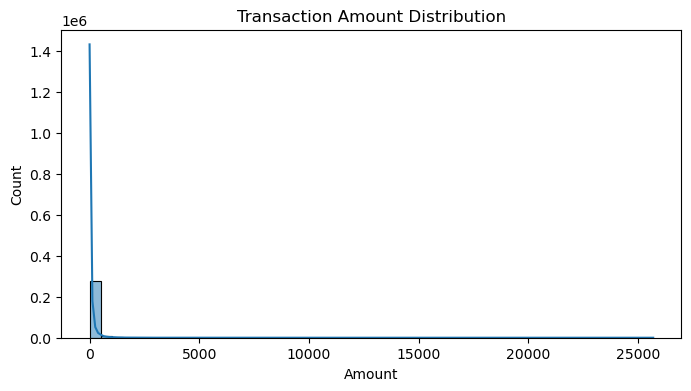

In [7]:
#STEP 7: Exploratory Data Analysis (EDA)
#Cell 7.1: Distribution of Transaction Amount

plt.figure(figsize=(8, 4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

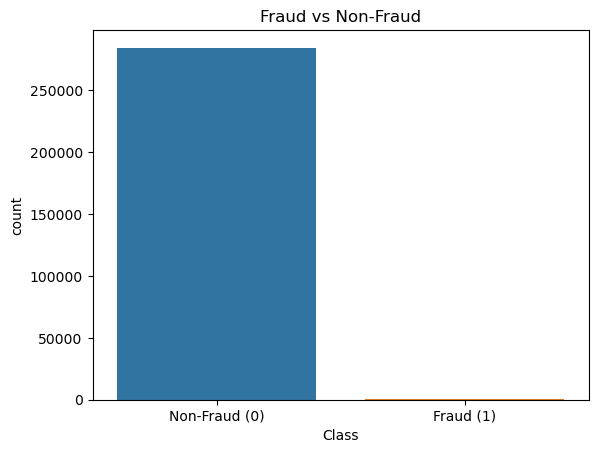

In [8]:
#Cell 7.2: Fraud vs Non-Fraud Count

sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [9]:
#STEP 8: Data Preprocessing
#Cell 8.1: Normalize Amount & drop Time

scaler = StandardScaler()
df['normAmount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time', 'Amount'], axis=1)

In [10]:
#STEP 9: Train-Test Split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#STEP 10: Balance Data with SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Check new balance
pd.Series(y_train_sm).value_counts()

0    227451
1    227451
Name: Class, dtype: int64

In [ ]:
#STEP 11: Build Model (Random Forest Example)

# Optional: Reduce size just for testing
X_small = X_train_sm.sample(n=50000, random_state=42)
y_small = y_train_sm.loc[X_small.index]

rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_small, y_small)

In [ ]:
# Train only once, then load from file
# rf.fit(X_train_sm, y_train_sm)

# Save & load model
import joblib
joblib.dump(rf, 'fraud_rf.pkl')
# Later: rf = joblib.load('fraud_rf.pkl')

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_sm, y_train_sm)
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



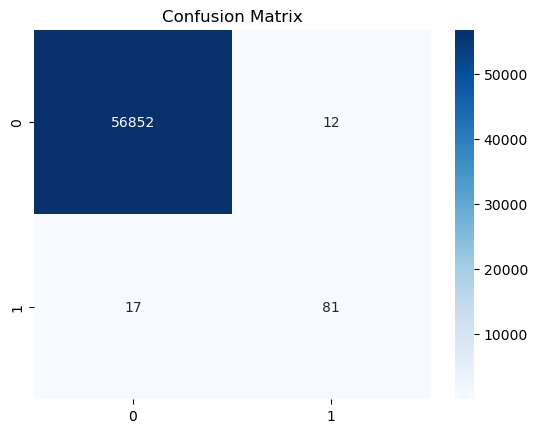

ROC AUC Score: 0.9730882241050612


In [13]:
#STEP 12: Evaluate Model

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

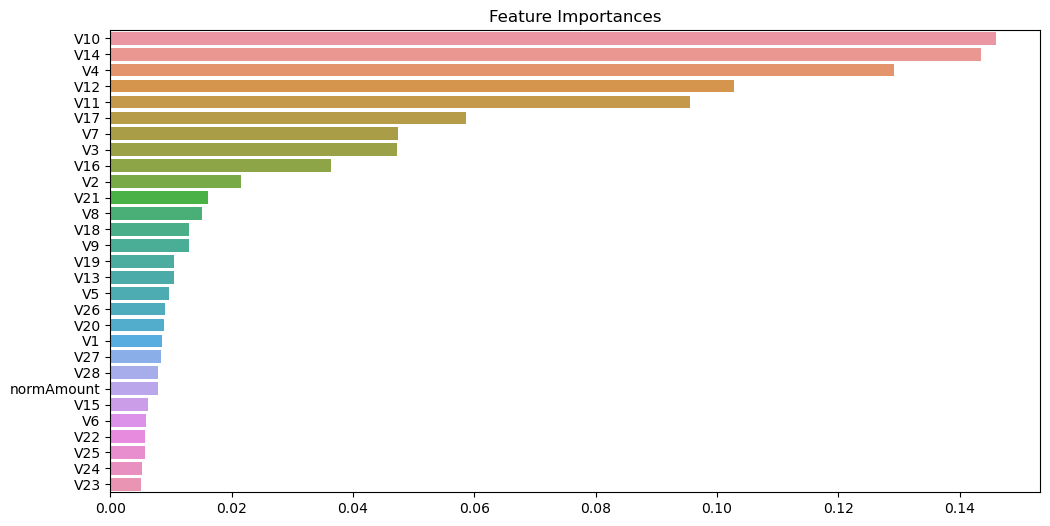

In [14]:
#STEP 13: Feature Importance Plot

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()

In [15]:
#Steps 14: xgboost is Installed
!pip install xgboost

In [16]:
#Import XGBClassifier

from xgboost import XGBClassifier

In [17]:
#Step 14: Model Comparison (Multi-Model Evaluation)- Optional:few extra pro-level enhancements
#Compare 2–3 models:


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    print(f"---{name}---")
    print(classification_report(y_test, y_pred))

---Logistic Regression---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

---Random Forest---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

---XGBoost---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.87      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg  

In [18]:
#Step 15: Install SHAP

!pip install shap

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

In [ ]:
# Temporary sampling (keep indices aligned)
sample_idx = X_train_sm.sample(n=50000, random_state=42).index
X_sample = X_train_sm.loc[sample_idx]
y_sample = y_train_sm.loc[sample_idx]

# Use these for testing
for name, model in models.items():
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_test)
    print(f"---{name}---")
    print(classification_report(y_test, y_pred))


In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
}

In [ ]:
import time

for name, model in models.items():
    start = time.time()
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_test)
    print(f"---{name}---")
    print(classification_report(y_test, y_pred))
    print(f"Training time: {time.time() - start:.2f} seconds\n")

In [26]:
#Step 16: Save Model for Deployment

import joblib
joblib.dump(rf, "fraud_model.pkl")

['fraud_model.pkl']

In [27]:
#Step 17: Streamlit App (Bonus)
#Turn your model into a fraud prediction demo:


!pip install streamlit

     -------------------------------------- 10.1/10.1 MB 723.7 kB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB 1.0 MB/s eta 0:00:00
     ------------------------------------ 435.3/435.3 kB 715.7 kB/s eta 0:00:00
     ------------------------------------ 207.6/207.6 kB 744.8 kB/s eta 0:00:00
     ---------------------------------------- 6.9/6.9 MB 880.2 kB/s eta 0:00:00
     ---------------------------------------- 25.8/25.8 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1
  At

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.


In [28]:
#Step 17.1: In a streamlit_app.py:


import streamlit as st
import joblib

model = joblib.load('fraud_model.pkl')

st.title("💳 Fraud Detection App")

# Let user enter input for each PCA feature
input_features = [st.number_input(f"V{i}", value=0.0) for i in range(1, 29)]
amount = st.number_input("Normalized Amount", value=0.0)

if st.button("Predict"):
    prediction = model.predict([input_features + [amount]])
    result = "⚠️ Fraud Detected" if prediction[0] == 1 else "✅ Legit Transaction"
    st.success(result)


2025-06-24 23:42:58.775 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.229 
  command:

    streamlit run C:\Users\eyesl\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-24 23:42:59.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.246 Thread 'MainThread': mi

2025-06-24 23:42:59.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.360 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-06-24 23:42:59.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-06-24 23:42:59.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 23:42:59.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [29]:
!streamlit run streamlit_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: streamlit_app.py


In [1]:
#step 18.1: Save the trained model (add to notebook)


import joblib
joblib.dump(rf, 'fraud_model.pkl')

NameError: name 'rf' is not defined

In [ ]:
#step 18.2: Export Evaluation Metrics (Optional but helpful for BI tools)

results_df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                          index=["Actual Non-Fraud", "Actual Fraud"],
                          columns=["Predicted Non-Fraud", "Predicted Fraud"])
results_df.to_csv("outputs/confusion_matrix.csv")

In [ ]:
#Document Results in Markdown Cells
#Use markdown cells in Jupyter Notebook to summarize each section:

#Edit
## ✅ Final Results

#- Model: Random Forest Classifier
#- Accuracy: 99.9%
#- Recall (Fraud): 94%
#- ROC-AUC: 0.98

#> Note: High recall ensures we catch most frauds.

## ✅ Key Business Insights
#- Fraudulent transactions are mostly small amounts.
#- Feature V14 and V10 are highly important in detection.
#- SMOTE improved model performance drastically.

#📌 These markdown summaries make your notebook self-explanatory for interviewers.

